<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Clustering Techniques

In [1]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

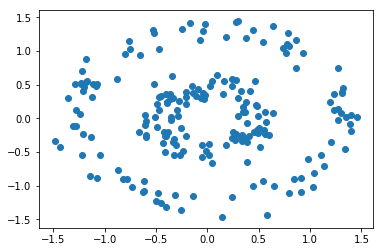

In [2]:
###########
# Generating data
###########

n = 100
X_data = np.zeros((2*n,2))

t = np.random.uniform(low=0,high=6.28,size=100)
X_data[0:n,0] = 1.3*np.cos(t)+np.random.uniform(low=-0.2,high=0.2,size=n)
X_data[0:n,1] = 1.3*np.sin(t)+np.random.uniform(low=-0.2,high=0.2,size=n)

X_data[n:,0] = 0.5*np.cos(t)+np.random.uniform(low=-0.2,high=0.2,size=n)
X_data[n:,1] = 0.5*np.sin(t)+np.random.uniform(low=-0.2,high=0.2,size=n)

plt.scatter(X_data[:,0],X_data[:,1])

(-1.6663396092270788,
 1.6393913638896818,
 -1.626949167476917,
 1.6021467594097674)

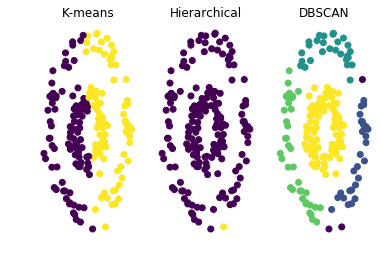

In [3]:
###########
# k-means Clustering
###########

km = cluster.KMeans(n_clusters=2, random_state=0)
km.fit(X_data)
cl_km = km.labels_


plt.figure(1)
plt.subplot(1,3,1)
plt.title('K-means')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_km)
plt.axis('off')

###########
# Hierarchical Clustering
###########

hc = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
#hc = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(X_data)
cl_hi = hc.labels_

plt.subplot(1,3,2)
plt.title('Hierarchical')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_hi)
plt.axis('off')

###########
# DBSCAN
###########

dbc = cluster.DBSCAN(eps=0.3, min_samples=2)
#dbc = cluster.DBSCAN(eps=0.1, min_samples=3)
dbc.fit(X_data)
cl_db = dbc.labels_

plt.subplot(1,3,3)
plt.title('DBSCAN')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_db)
plt.axis('off')

## Homework Clustering Digit Images

In [4]:
import numpy as np
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

(1797, 8, 8)


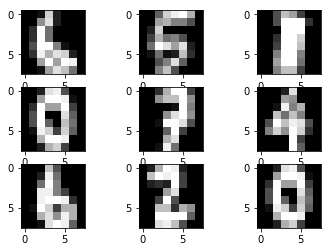

In [5]:
digits = datasets.load_digits() ##carrega matrizes que representam imagens 
print(digits.images.shape)

#showing some images randomly chosen
cimag = np.random.randint(low=0,high=digits.images.shape[0],size=9)
for i in range(cimag.size):
    plt.subplot(3,3,i+1)
    plt.imshow(digits.images[cimag[i]], cmap='gray')

Perform the following tasks:
1. Convert digit images in points in a high-dimensional space (hit: 64-dimensional spaxce)
2. clusterize the points using hierarchical clustering, k-means, and DBSCAN
3. Use the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)  to compare the quality of the cluster resulting from each technique (see [Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)) for the mathematical definition of silhouete score)
4. Use PCA to visualize the generated clusters
5. Which are the images classified as noise by DBSCAN?

In [6]:
### Exercises

In [7]:
##1
digits = datasets.load_digits()
points = np.zeros((digits.images.shape[0],64))
for i in range(digits.images.shape[0]):
    points[i,:] = digits.images[i].ravel()

In [8]:
##2

###########
# k-means Clustering
###########

kmeans = cluster.KMeans(n_clusters=10, random_state=50)
kmeans.fit(points)
cl_kmeans = kmeans.labels_

###########
# Hierarchical Clustering
###########

hierclust = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierclust.fit(points)
cl_hierclust = hierclust.labels_

In [70]:
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

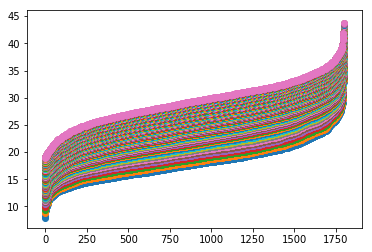

In [131]:
### para cada linha da matriz de distancias
##ordeno as distancias, pego os k vizinhos mais próximos
##calculo a média as médias, com o objetivo de plotar
##o conceito consiste em encontrar o Knee da função

distances = metrics.pairwise_distances(points) ##matriz de distâncias entre cada par (simétrica)
for k in range(3,100):
    k_neighbors = [] ##cria lista das médias dos k_neighbors para cada lista.
    for i in range(distances.shape[0]): 
        distances[i].sort() 
        values = distances[i][1:k+1]
        average = np.mean(values)
        k_neighbors.append(average)
    k_neighbors.sort()
    x = np.array([range(len(k_neighbors))])
    y = np.array(k_neighbors)
    plt.scatter(x,y)

In [122]:
###########
#  DBSCAN
###########

dbscan = cluster.DBSCAN(eps=25, min_samples=30) ##números ajustados para que existissem 10 rótulos. 
dbscan.fit(points)
cl_dbscan = dbscan.labels_
conj = set(cl_dbscan)
tam = len(conj)
print(tam)

10


In [123]:
##3
from sklearn import metrics

In [124]:
s1_km = metrics.silhouette_score(points,cl_kmeans) ##calculo nos dados poins a silhouette score de k_means. Esse valor é baixo
s2_hc = metrics.silhouette_score(points,cl_hierclust)
s3_db = metrics.silhouette_score(points,cl_dbscan)
print((s1_km,s2_hc,s3_db))

(0.1825962025587557, 0.17849659940596496, 0.13024641896481537)


In [129]:
##4
from sklearn.decomposition import PCA
%matplotlib inline

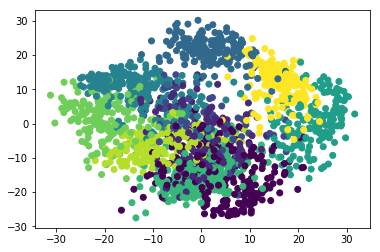

In [130]:
kmeans_pca = PCA(n_components=2).fit_transform(points)
plt.scatter(kmeans_pca[:,0],kmeans_pca[:,1],c=kmeans.labels_)

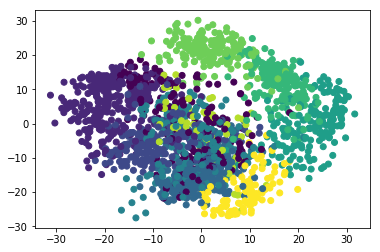

In [132]:
hierarchiecal_pca = PCA(n_components=2).fit_transform(points)
plt.scatter(hierarchiecal_pca[:,0],hierarchiecal_pca[:,1],c=hierclust.labels_)

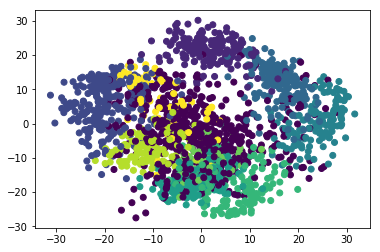

In [133]:
dbscan_pca = PCA(n_components=2).fit_transform(points)
plt.scatter(dbscan_pca[:,0],dbscan_pca[:,1],c=dbscan.labels_)

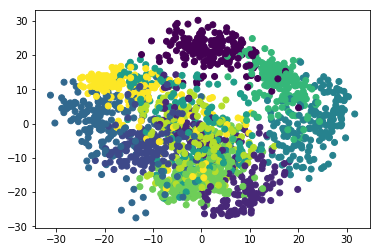

In [134]:
# computing PCA

from sklearn.decomposition import PCA

digits_pca = PCA(n_components=2)
point_digits_pca = digits_pca.fit_transform(points)

#plt.scatter(point_digits_pca[:,0],point_digits_pca[:,1])

plt.scatter(point_digits_pca[:,0],point_digits_pca[:,1],c=digits.target)

In [154]:
##5
labels = list(dbscan.labels_)
labels.count(-1)

538